# Loading Items

In [25]:
import importlib

import pandas as pd
import matplotlib.pyplot as plt

import count_word_frequency as cwf
import generate_synonyms as gs
import plotting as pl
importlib.reload(cwf)
importlib.reload(gs)
importlib.reload(pl)

<module 'plotting' from '/Users/jinli/Projects/FAUI/Yelp/NLP_NEW/notebooks/plotting.py'>

In [2]:
with open("../tests/sample_text/text1.txt") as f:
    sample_text1 = f.read()

with open("../tests/sample_text/text2.txt") as f:
    sample_text2 = f.read()
    
sample_reviews = set({sample_text1, sample_text2})

In [17]:
# sample_reviews
business1 = cwf.Business("Cafe1")
business1.find_review_info(sample_reviews)
business1.aggregate_word_freq()

In [ ]:
# business2 = cwf.Business("Cafe2")
# business2.quick_aggregate(sample_reviews)
# business2.all_word_freq

In [ ]:
# gs.write_resulting_words(synsets, filter_dir + '/hyponym_words.txt')

In [ ]:
# gs.print_definitions(pos_synsets_rm, filter_dir + '/definitions.txt')

In [ ]:
# gs.write_out_hyponyms(synsets, filter_dir + '/hyponyms.txt')

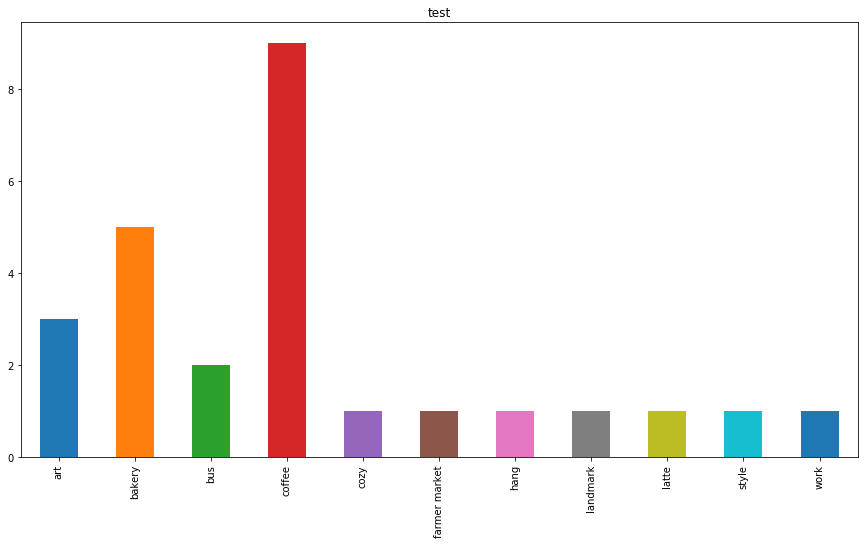

In [26]:
pl.createplot(
    business1.key_word_freq,
    "test",
    "../plots/key_word_frequency_plots/test.png")